In [32]:
# IMPORTING MODULES
import glob
import importlib
import matplotlib.pyplot as plt
import numpy as np
import os
module_path = os.path.abspath(os.path.join('..', 'src'))
sys.path.append(module_path)
import pandas as pd
import scipy.signal as ss
import sys

import tools.data_reader as dr
import tools.display_tools as dt
import tools.preprocessing as preprocessing

from scipy.fft import fft, fftfreq, fftshift


In [ ]:
#LOAD ECG DATA
importlib.reload(dr)
importlib.reload(dt)
importlib.reload(preprocessing)

convert_sr = False
task = dr.Tasks.BASELINE
data_type = dr.DataTypes.ECG
phase = dr.Phases.BASE_REST
fs = 250.0
f_dim = preprocessing.DATA_TYPE_DIMENSIONS[data_type]

ha_ecg, la_ecg = preprocessing.load_data(task, data_type, phase, convert_sr)

data = la_ecg[0]
preprocessing.plot_1d_data(data[500:1000])

# ha_ecg = preprocessing.crop_list_of_ndarrays(ha_ecg)
# la_ecg = preprocessing.crop_list_of_ndarrays(la_ecg)
# freq, ha_ecg_fft = preprocessing.calculate_fft(ha_ecg, fs, f_dim)
# freq, la_ecg_fft = preprocessing.calculate_fft(la_ecg, fs, f_dim)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


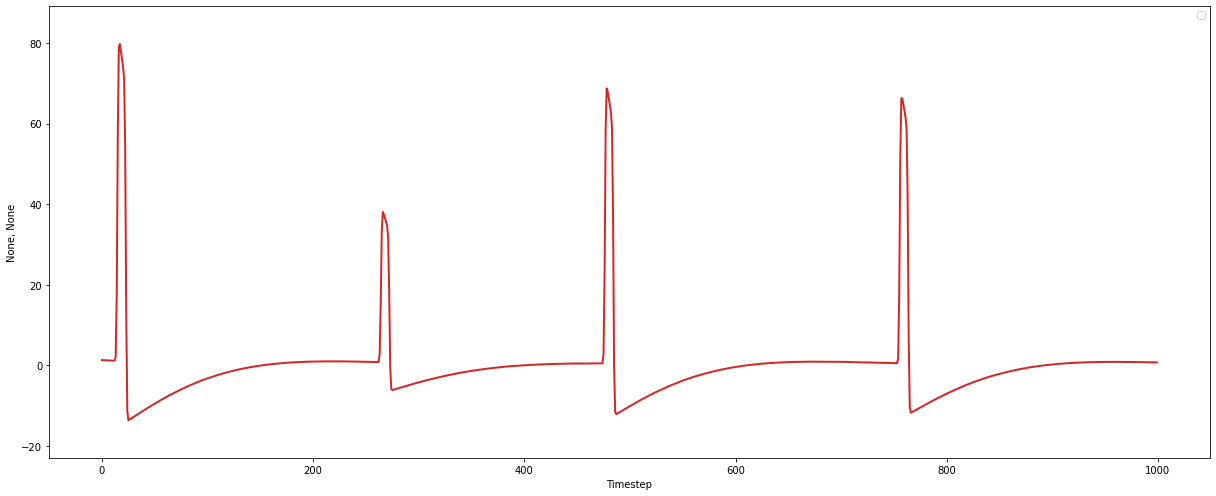

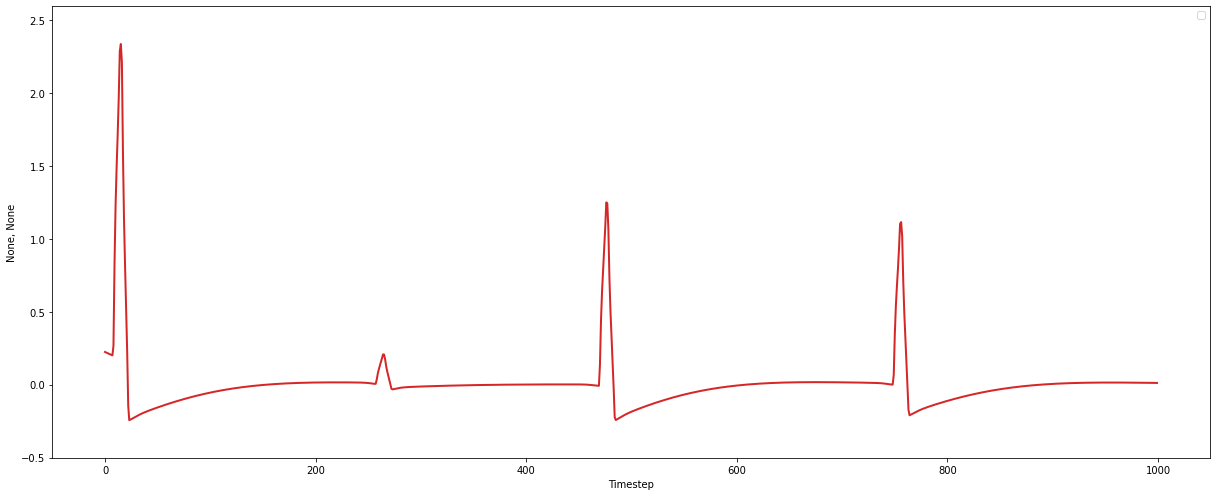

In [216]:
importlib.reload(dr)
importlib.reload(dt)
importlib.reload(preprocessing)

data = ha_ecg[4]
dt.plot_1d_data(data[10000:11000])

data = preprocessing.clean_ecg(data)
dt.plot_1d_data(data[10000:11000])


In [ ]:
# EXAMPLES ON HOW TO PLOT FFT USING DIFFERENT METHODS (calculate_fft, calculate_fft_1d, calculate_group_metric)

importlib.reload(dr)
importlib.reload(dt)
importlib.reload(preprocessing)

convert_sr = False
is_clean_ecg = False
task = dr.Tasks.BASELINE
data_type = dr.DataTypes.ECG
phase = dr.Phases.BASE_REST
fs = 250.0
f_dim = preprocessing.DATA_TYPE_DIMENSIONS[data_type]

ha_ecg, la_ecg = preprocessing.load_data(task, data_type, phase, convert_sr)
data = ha_ecg[0]
data = np.reshape(data, (data.size, 1))
freq, fft = preprocessing.calculate_fft(data, fs, feature_dim=f_dim)
dt.plot_fft_data(freq[1:], fft[0][1:], data_type="ECG BASELINE REST", labels="HA")



freq, fft = preprocessing.calculate_fft_1d(data, fs)
dt.plot_fft_data(freq[1:], fft[1:], data_type="ECG BASELINE REST", labels="HA")


print("FROM BATCH CALCULATED FFT")
freq, ha_ecg_fft = preprocessing.calculate_group_metric("HA", task, data_type, phase, "fft")
dt.plot_fft_data(freq[1:], ha_ecg_fft[1:, 0, 0], data_type="ECG BASELINE REST", labels="HA")



In [ ]:
# FEATURE EXTRACTION WITH HEARTPY - BPM, RMSSD
# WORKS
importlib.reload(dr)
importlib.reload(dt)
importlib.reload(preprocessing)

import heartpy as hp

convert_sr = False
tasks = [dr.Tasks.BASELINE, dr.Tasks.BUGS, dr.Tasks.SPEAKING]
data_type = dr.DataTypes.ECG
# measure = "bpm"
measure = "rmssd"
fs = 250.0
f_dim = preprocessing.DATA_TYPE_DIMENSIONS[data_type]

ha_ecg, la_ecg = preprocessing.load_data(task, data_type, phase, convert_sr)
# freq, ha_ecg_fft = preprocessing.calculate_group_metric("HA", task, data_type, phase, "fft")
# freq, la_ecg_fft = preprocessing.calculate_group_metric("LA", task, data_type, phase, "fft")


for task in tasks:
    if task == dr.Tasks.BASELINE:
        phases = [dr.Phases.BASE_REST, dr.Phases.BASE_SPEECH]
    elif task == dr.Tasks.BUGS:
        phases = [dr.Phases.BUG_RELAX, dr.Phases.BUG_INSTRUCTIONS, dr.Phases.BUG_ANTICIPATE, dr.Phases.BUG_DECISION, dr.Phases.BUG_EXPOSURE, dr.Phases.BUG_BREAK, dr.Phases.BUG_REFLECT]
    else:
        phases = [dr.Phases.SPEECH_RELAX, dr.Phases.SPEECH_INSTRUCTIONS, dr.Phases.SPEECH_ANTICIPATE, dr.Phases.SPEECH_DECISION, dr.Phases.SPEECH_EXPOSURE, dr.Phases.SPEECH_BREAK, dr.Phases.SPEECH_REFLECT]
    for phase in phases:
        la = []
        ha = []
        print(f"LA {phase}")
        for i in range(len(la_ecg)):
            # print(f"Index {i}")
            data = la_ecg[i].flatten()
            working_data, measures = hp.process_segmentwise(data, fs, segment_width=55, segment_overlap=5/55)
            bpm = measures[f"{measure}"]
            # while bpm > 130.0:
            #     # hp.plotter(working_data, measures, figsize=(17, 7), title=f"HR Peak Detection, LA @ index {i}")  
            #     print(f"\tInvalid {measure} of {bpm} for LA at index {i}, reprocessing...")
            #     data = hp.filter_signal(data, cutoff=5, sample_rate=fs, order=3)
            #     # data = hp.enhance_ecg_peaks(data, fs)
            #     try:
            #         working_data, measures = hp.process_segmentwise(data, fs, calc_freq=True, freq_method="fft")
            #     except Exception as e:
            #         print(f"Error with LA index {i}: {e}")
            #     bpm = measures[f"{measure}"]
            la.append(bpm)
            # print(f"\tBPM: {bpm}")

        print(f"HA {phase}")
        for i in range(len(ha_ecg)):
            # print(f"Index {i}")
            data = ha_ecg[i].flatten()
            working_data, measures = hp.process_segmentwise(data, fs, segment_width=55, segment_overlap=5/55)
            bpm = measures[f"{measure}"]
            # while bpm > 130.0:
            #     # hp.plotter(working_data, measures, figsize=(17, 7), title=f"HR Peak Detection, HA @ index {i}")  
            #     print(f"\tInvalid {measure} of {bpm} for HA at index {i}, reprocessing...")
            #     data = hp.filter_signal(data, cutoff=5, sample_rate=fs, order=3)
            #     # data = hp.enhance_ecg_peaks(data, fs)
            #     try:
            #         working_data, measures = hp.process_segmentwise(data, fs, calc_freq=True, freq_method="fft")
            #     except Exception as e:
            #         print(f"Error with HA index {i}: {e}")
            #     bpm = measures[f"{measure}"]
            ha.append(bpm)
            # print(f"\tBPM: {bpm}")

        # bpm_array = np.array([la, ha]).transpose()
        ha_df = pd.DataFrame(ha)
        la_df = pd.DataFrame(la)

        ha_file = os.path.join(dr.Paths.METRICS, f"{measure}_{phase}_ha.csv")
        la_file = os.path.join(dr.Paths.METRICS, f"{measure}_{phase}_la.csv")
        with open(ha_file, "w+") as f:
            ha_df.to_csv(f)
        with open(la_file, "w+") as f:
            la_df.to_csv(f)


In [ ]:
# FEATURE EXTRACTION - HF RR, LF RR
# WORKS
importlib.reload(dr)
importlib.reload(dt)
importlib.reload(preprocessing)


convert_sr = False
is_clean_ecg = False
tasks = [dr.Tasks.BASELINE, dr.Tasks.BUGS, dr.Tasks.SPEAKING]
data_type = dr.DataTypes.ECG
# measure = "hf_rr"
measure = "lf_rr"
fs = preprocessing.FS_DICT[data_type]
f_dim = preprocessing.DATA_TYPE_DIMENSIONS[data_type]

ha_ecg, la_ecg = preprocessing.load_data(task, data_type, phase, convert_sr, is_clean_ecg)


for task in tasks:
    if task == dr.Tasks.BASELINE:
        phases = [dr.Phases.BASE_REST, dr.Phases.BASE_SPEECH]
    elif task == dr.Tasks.BUGS:
        phases = [dr.Phases.BUG_RELAX, dr.Phases.BUG_INSTRUCTIONS, dr.Phases.BUG_ANTICIPATE, dr.Phases.BUG_DECISION, dr.Phases.BUG_EXPOSURE, dr.Phases.BUG_BREAK, dr.Phases.BUG_REFLECT]
    else:
        phases = [dr.Phases.SPEECH_RELAX, dr.Phases.SPEECH_INSTRUCTIONS, dr.Phases.SPEECH_ANTICIPATE, dr.Phases.SPEECH_DECISION, dr.Phases.SPEECH_EXPOSURE, dr.Phases.SPEECH_BREAK, dr.Phases.SPEECH_REFLECT]
    for phase in phases:
        la = []
        ha = []
        print(f"LA {phase}")
        for i in range(len(la_ecg)):
            data = la_ecg[i].flatten()
            if measure == "hf_rr":
                value = preprocessing.get_hf_rr(data)
            else:
                value = preprocessing.get_lf_rr(data)
            la.append(value)

        print(f"HA {phase}")
        for i in range(len(ha_ecg)):
            data = ha_ecg[i].flatten()
            if measure == "hf_rr":
                value = preprocessing.get_hf_rr(data)
            else:
                value = preprocessing.get_lf_rr(data)
            la.append(value)

        ha_df = pd.DataFrame(ha)
        la_df = pd.DataFrame(la)

        ha_file = os.path.join(dr.Paths.METRICS, f"{measure}_{phase}_ha.csv")
        la_file = os.path.join(dr.Paths.METRICS, f"{measure}_{phase}_la.csv")
        with open(ha_file, "w+") as f:
            ha_df.to_csv(f)
        with open(la_file, "w+") as f:
            la_df.to_csv(f)


In [143]:
# FEATURE EXTRACTION - EDA
# WIP
importlib.reload(dr)
importlib.reload(dt)
importlib.reload(preprocessing)


convert_sr = False
tasks = [dr.Tasks.BASELINE, dr.Tasks.BUGS, dr.Tasks.SPEAKING]
data_type = dr.DataTypes.EDA
# measure = "mean_SCL"
measure = "SCR_rate"
fs = preprocessing.FS_DICT[data_type]
f_dim = preprocessing.DATA_TYPE_DIMENSIONS[data_type]

ha_eda, la_eda = preprocessing.load_data(task, data_type, phase, convert_sr)


for task in tasks:
    if task == dr.Tasks.BASELINE:
        phases = [dr.Phases.BASE_REST, dr.Phases.BASE_SPEECH]
    elif task == dr.Tasks.BUGS:
        phases = [dr.Phases.BUG_RELAX, dr.Phases.BUG_INSTRUCTIONS, dr.Phases.BUG_ANTICIPATE, dr.Phases.BUG_DECISION, dr.Phases.BUG_EXPOSURE, dr.Phases.BUG_BREAK, dr.Phases.BUG_REFLECT]
    else:
        phases = [dr.Phases.SPEECH_RELAX, dr.Phases.SPEECH_INSTRUCTIONS, dr.Phases.SPEECH_ANTICIPATE, dr.Phases.SPEECH_DECISION, dr.Phases.SPEECH_EXPOSURE, dr.Phases.SPEECH_BREAK, dr.Phases.SPEECH_REFLECT]
    for phase in phases:
        la = []
        ha = []
        print(f"LA {phase}")
        for i in range(len(la_ecg)):
            data = la_eda[i].flatten()
            if measure == "mean_SCL":
                value = preprocessing.get_mean_SCL(data)
            else:
                value = preprocessing.get_SCR_rate(data)
            la.append(value)

        print(f"HA {phase}")
        for i in range(len(ha_eda)):
            data = ha_eda[i].flatten()
            if measure == "mean_SCL":
                value = preprocessing.get_mean_SCL(data)
            else:
                value = preprocessing.get_SCR_rate(data)
            la.append(value)

        ha_df = pd.DataFrame(ha)
        la_df = pd.DataFrame(la)

        ha_file = os.path.join(dr.Paths.METRICS, f"{measure}_{phase}_ha.csv")
        la_file = os.path.join(dr.Paths.METRICS, f"{measure}_{phase}_la.csv")
        with open(ha_file, "w+") as f:
            ha_df.to_csv(f)
        with open(la_file, "w+") as f:
            la_df.to_csv(f)


LA Baseline_Rest
HA Baseline_Rest
LA Baseline_Speech
HA Baseline_Speech
LA BugBox_Relax
HA BugBox_Relax
LA BugBox_Instructions
HA BugBox_Instructions
LA BugBox_Anticipate
HA BugBox_Anticipate
LA BugBox_Decision
HA BugBox_Decision
LA BugBox_Exposure
HA BugBox_Exposure
LA BugBox_Break
HA BugBox_Break
LA BugBox_Reflect
HA BugBox_Reflect
LA Speech_Relax
HA Speech_Relax
LA Speech_Instructions
HA Speech_Instructions
LA Speech_Anticipate
HA Speech_Anticipate
LA Speech_Decision
HA Speech_Decision
LA Speech_Exposure
HA Speech_Exposure
LA Speech_Break
HA Speech_Break
LA Speech_Reflect
HA Speech_Reflect
